# MINST from NumPy

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(m_train)

41000


In [10]:
def init_params():
    '''
    Initialites W1,b1,W2,b2 for two layer NN (10 neurons per each)
    '''
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 0 0 ... 2 2 0] [4 4 0 ... 9 2 9]
0.0863170731707317
Iteration:  10
[0 0 0 ... 8 2 0] [4 4 0 ... 9 2 9]
0.11507317073170732
Iteration:  20
[0 0 0 ... 8 2 0] [4 4 0 ... 9 2 9]
0.18348780487804878
Iteration:  30
[0 0 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.26065853658536586
Iteration:  40
[0 0 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.29741463414634145
Iteration:  50
[0 0 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.32595121951219513
Iteration:  60
[0 0 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.35585365853658535
Iteration:  70
[0 0 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.3871707317073171
Iteration:  80
[0 0 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.4166341463414634
Iteration:  90
[0 0 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.45702439024390246
Iteration:  100
[0 4 0 ... 0 2 0] [4 4 0 ... 9 2 9]
0.4985609756097561
Iteration:  110
[0 4 0 ... 0 2 9] [4 4 0 ... 9 2 9]
0.5302439024390244
Iteration:  120
[0 4 0 ... 0 2 9] [4 4 0 ... 9 2 9]
0.559219512195122
Iteration:  130
[0 4 0 ... 0 2 9] [4 4 0 ... 9 2 9]
0.585
Iteration:  140
[4 4 0 .

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()  
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


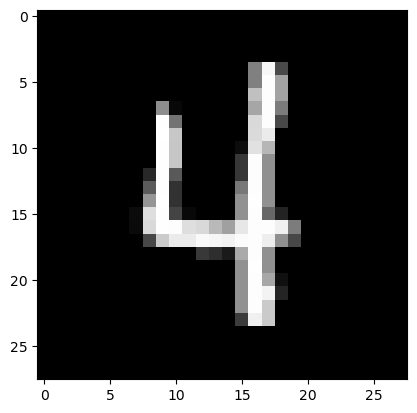

Prediction:  [4]
Label:  4


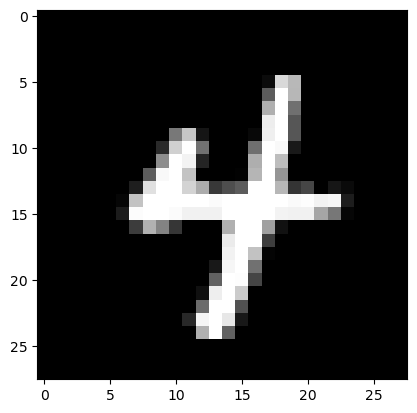

Prediction:  [0]
Label:  0


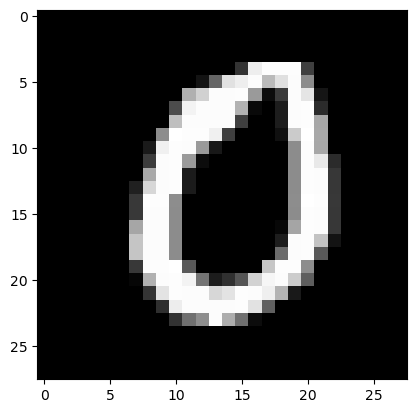

Prediction:  [2]
Label:  2


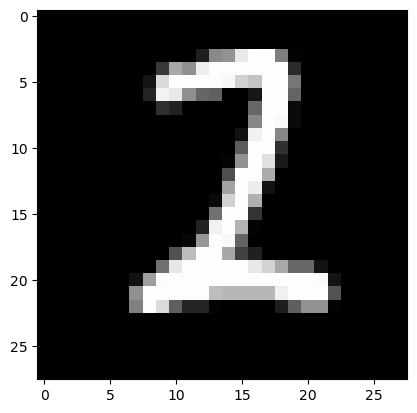

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 1 7 2 1 1 2 0 8 4 8 5 2 2 1 2 0 2 2 0 5 0 8 1 8 2 3 0 3 1 2 5 0 1 3 9 2
 0 5 1 6 5 0 2 3 0 0 8 4 7 2 8 1 4 4 1 3 0 4 1 2 0 4 4 7 0 0 2 8 1 2 2 3 4
 4 5 0 8 2 4 4 7 0 6 2 1 1 0 9 0 0 3 8 0 9 9 5 8 5 4 1 0 0 4 7 2 0 8 9 2 0
 2 3 3 8 8 2 0 2 7 2 7 9 1 0 4 8 0 0 4 7 1 0 8 7 4 8 4 3 2 7 8 8 0 4 2 3 8
 0 4 3 7 1 9 2 3 0 8 8 5 9 7 7 8 1 0 3 1 4 0 2 2 0 2 7 7 0 0 0 6 6 2 7 0 9
 2 8 3 0 2 4 0 3 1 4 7 0 9 2 8 7 3 4 0 8 8 2 3 8 8 0 1 1 8 7 8 2 7 4 4 8 6
 1 0 3 7 8 2 1 4 2 0 8 7 0 7 7 0 2 5 4 0 1 2 4 1 2 8 0 7 8 1 2 5 8 7 0 2 1
 0 8 1 1 4 6 1 7 2 0 0 4 0 4 8 8 3 0 0 2 2 2 4 5 3 1 1 5 8 5 4 2 0 0 0 0 7
 3 7 4 0 0 3 9 8 7 0 0 0 0 6 1 1 2 9 0 0 3 1 4 0 4 8 0 1 8 0 7 8 5 8 1 7 1
 1 2 2 7 2 1 4 6 0 1 7 1 0 4 4 9 7 2 2 0 4 4 2 1 8 0 1 3 0 6 8 5 3 8 7 5 2
 4 0 2 3 4 1 2 5 7 2 2 7 0 1 5 0 0 3 0 2 1 2 0 4 4 7 6 1 2 4 8 4 4 2 8 2 1
 0 2 9 0 2 4 8 4 0 4 4 7 1 2 0 2 6 0 2 0 6 7 2 3 7 0 4 3 2 8 7 8 3 4 3 2 5
 3 7 2 2 0 4 9 7 1 7 1 2 8 4 2 1 0 1 1 1 4 1 6 0 3 3 2 0 2 2 2 5 8 0 1 8 2
 4 0 2 7 7 5 2 2 4 7 7 5 

C:\Users\Ruwinda Nanayakkara\AppData\Local\Temp\ipykernel_11840\1108943977.py:15: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\Ruwinda Nanayakkara\AppData\Local\Temp\ipykernel_11840\1108943977.py:15: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


0.66